In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# This block of code has been taken from the week 4's notebook.
def undirectedconnectiongraph(xnum=30, ynum=30):
    G = {'V':[], 'E':[]} # We will use a dictionary for simplicity
    for xind in range(xnum):
      for yind in range(ynum):
        G['V'].append((xind, yind))

    # Traverse north first
    for pt in G['V']:
      vtn = north(pt[0], pt[1])
      if isvertex(vtn, G['V']):
        G['E'].append((pt, vtn))
    
    # Traverse east second
    for pt in G['V']:
      vte = east(pt[0], pt[1])
      if isvertex(vte, G['V']):
        G['E'].append((pt, vte))
    return G
    
def north(xind, yind):
    node = (xind, yind + 1)
    return node
    
def south(xind, yind):
    node = (xind, yind - 1)
    return node
  
def east(xind, yind):
    node = (xind + 1, yind)
    return node

def west(xind, yind):
    node = (xind - 1, yind)
    return node

def isvertex(node, vertices):
    return node in vertices

def plotgraph(G, vertexflag=True):
    for e in G['E']:
      vec = np.array([e[1][0]-e[0][0], e[1][1]-e[0][1]])
      ort = np.array([-vec[1], vec[0]])
      olen = np.linalg.norm(ort)
      ort = ort / olen
      sum = np.array([(e[1][0]+e[0][0])/2, (e[1][1]+e[0][1])/2])
      startp = sum - ort / 2
      endp = sum + ort / 2
      plt.plot((startp[0], endp[0]), (startp[1], endp[1]), 'k', linewidth=12)
      if vertexflag:
        for v in G['V']:
          plt.plot(float(v[0]), float(v[1]), 'ro')
    plt.axis('square')
    plt.show()

def randomnode(vertices):
    vertices = list(vertices)
    randind = np.random.randint(0, len(vertices))
    return vertices[randind]



In [3]:
# Below function is written by following the pseudo code in the text book. No improvising has been done. No ChatGPT is used.

def pimmsmaze(G : dict):
    assert 'V' in G # Necessary assertions...
    assert 'E' in G
    assert len(G['V']) >= 1


    C = set() # All the cells are unvisited.
    W = set(G['E'].copy()) # All the connections have walls.
    L = set() 

    c = randomnode(G['V'])
    for w in W:
        if c in w:
            L.add(w) # Initialize L with the neighbours of c.

    while len(L) != 0:
        l = randomnode(L)

        if len(C.intersection(l)) <= 1: # Both ends not already visited.
            C.update(l)
            W.remove(l) # Remove the wall.

            for w in W:
                if len(set(l).intersection(w)) > 0:
                    if not(w in L):
                        L.add(w) # Add the neighbouring walls.

        L.remove(l)
    
    maze = {} 
    
    maze['V'] = G['V'].copy()
    maze['E'] = list(W) # Update the graph with new walls

    return maze

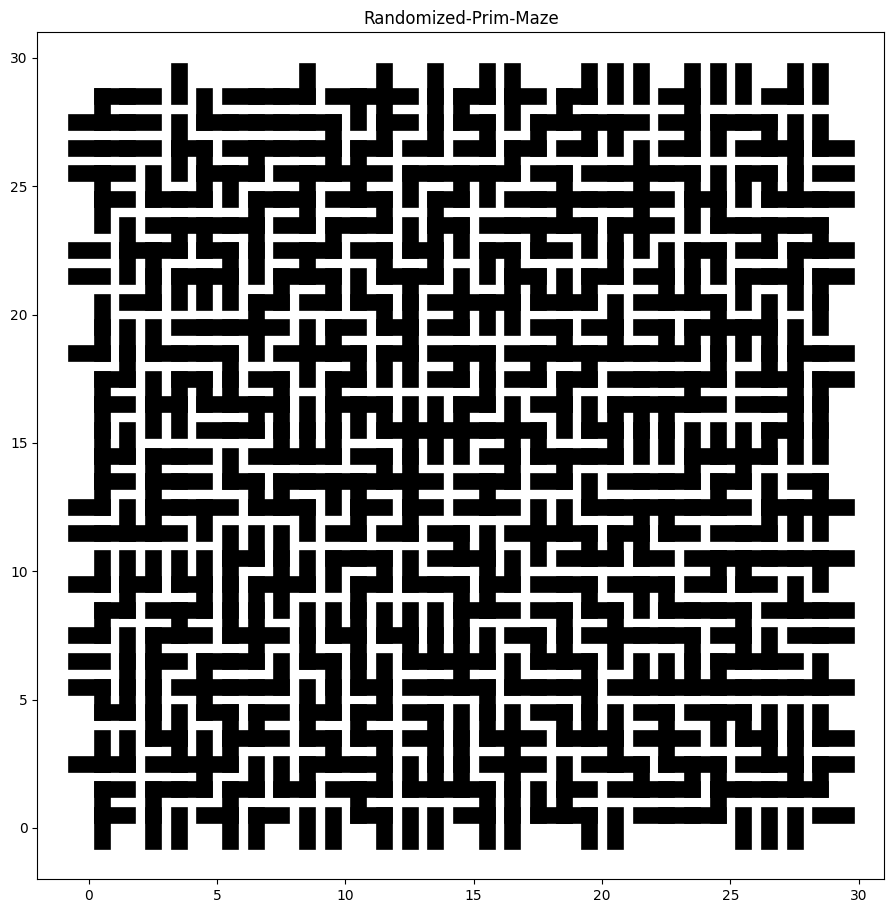

In [4]:
# These lines is taken from the notebook also, just changed the graph size, and figure size.

G = undirectedconnectiongraph(30, 30)
M = pimmsmaze(G)
plt.figure(figsize=(22,11))
plt.title('Randomized-Prim-Maze')
plotgraph(M, False)